<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ETUDE DE MARCHE : LA POULE QUI CHANTE - ACP</h1>
</div>

In [ ]:
%pip install scikit-learn

In [ ]:
%pip install geopandas matplotlib


In [ ]:
%pip install geoplot geopandas


In [43]:
#Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Charger le fichier
df_donnees = pd.read_csv("../data/donnees_completes.csv")

df_donnees

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB,Infrastructures,Douanes (%),dist
0,Afghanistan,2017,36296113.0,2000.0,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771,1.835473,NaN,5590.3810
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083,3.776261,6.67,9353.5520
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969,1.980952,1.22,1603.5340
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540,2.577318,12.32,1340.3900
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958,4.439356,2.48,439.8984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716,4.069324,4.56,5249.5350
165,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448,2.469210,9.42,9367.0980
166,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073,4.152011,3.36,5838.1570
167,Éthiopie,2017,106399924.0,1000.0,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434,2.117674,NaN,5582.5020


In [4]:
# Supprimer la colonne 'Année'
df_donnees = df_donnees.drop(columns=['Année'])

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">ACP</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Préparation des données</h3>

In [5]:
# Sélectionner les colonnes numériques
colonnes_numeriques = df_donnees.select_dtypes(include=[np.number]).columns
df_numerique = df_donnees[colonnes_numeriques]

# Afficher les colonnes sélectionnées
print("\nColonnes numériques sélectionnées :")
print(df_numerique.columns)



Colonnes numériques sélectionnées :
Index(['Population', 'Exportations (t)', 'Importations (t)', 'Nourriture (t)',
       'Production (t)', 'Stabilité politique', 'PIB', 'Infrastructures',
       'Douanes (%)', 'dist'],
      dtype='object')


In [6]:
# Remplacer les valeurs manquantes par la moyenne
df_numerique = df_numerique.fillna(df_numerique.mean())

# Vérifier qu'il n'y a plus de valeurs manquantes
print("\nValeurs manquantes après traitement :")
print(df_numerique.isna().sum())



Valeurs manquantes après traitement :
Population             0
Exportations (t)       0
Importations (t)       0
Nourriture (t)         0
Production (t)         0
Stabilité politique    0
PIB                    0
Infrastructures        0
Douanes (%)            0
dist                   0
dtype: int64


In [7]:
# Standardiser les données
scaler = StandardScaler()
df_standardise = scaler.fit_transform(df_numerique)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Analyse des composantes</h3>

In [8]:
# Appliquer l'ACP
pca = PCA()
pca.fit(df_standardise)

# Afficher la variance expliquée par chaque composante
print("\nVariance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)



Variance expliquée par chaque composante :
[3.40170289e-01 2.45835206e-01 1.11193461e-01 8.93611726e-02
 7.14179522e-02 6.53539778e-02 3.90517119e-02 2.27607562e-02
 1.47374136e-02 1.18059010e-04]


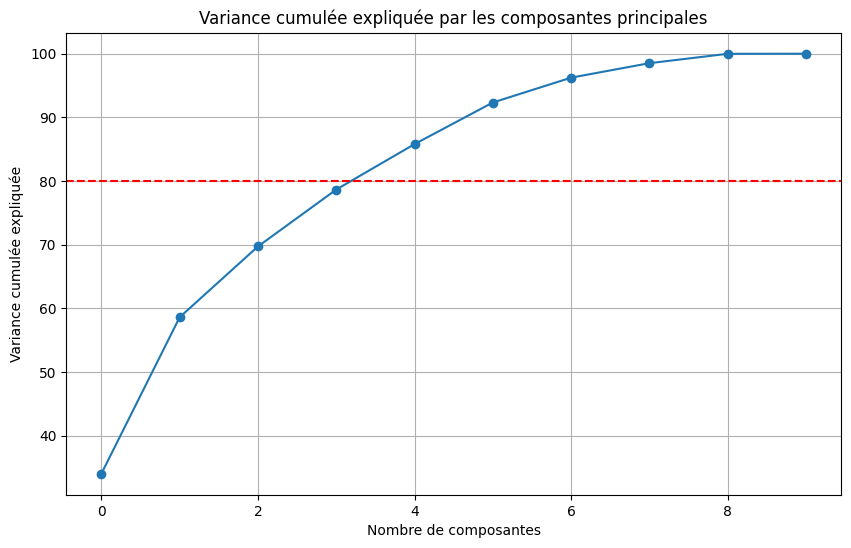

In [9]:
# Calculer la variance cumulée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_) * 100

# Tracer la variance cumulée
plt.figure(figsize=(10, 6))
plt.plot(variance_cumulee, marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée expliquée")
plt.title("Variance cumulée expliquée par les composantes principales")
plt.grid()


# Ajouter la droite à 80%
plt.axhline(y=80, color='r', linestyle='--', label='Seuil 80%')

plt.show()


3 composantes principales peuvent expliquer 80% de la variance cumulée


In [10]:
def plot_correlation_circle(correlations, comp1, comp2, explained_variance):
    plt.figure(figsize=(10, 8))

    # Dessiner le cercle de rayon 1
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

    # Dessiner les flèches pour chaque variable
    for i in range(len(correlations)):
        plt.arrow(0, 0, correlations.iloc[i, comp1], correlations.iloc[i, comp2],
                  color='r', alpha=0.5, head_width=0.05, head_length=0.05)
        plt.text(correlations.iloc[i, comp1]*1.15, correlations.iloc[i, comp2]*1.15,
                 correlations.index[i], color='r', ha='center', va='center')

    # Ajouter les axes
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

    # Limites des axes
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)

    # Titres et labels
    plt.xlabel(f"Composante {comp1+1} ({explained_variance[comp1]*100:.1f}%)")
    plt.ylabel(f"Composante {comp2+1} ({explained_variance[comp2]*100:.1f}%)")
    plt.title(f"Cercle des corrélations (Composantes {comp1+1} et {comp2+1})")

    # Afficher le graphique
    plt.grid()
    plt.show()



In [11]:
# Appliquer l'ACP avec 3 composantes
pca = PCA(n_components=3)
pca.fit(df_standardise)

# Calculer les corrélations entre les variables et les 3 composantes
correlations = pd.DataFrame(pca.components_.T, columns=[f"Composante {i+1}" for i in range(3)], index=df_numerique.columns)

# Récupérer la variance expliquée
explained_variance = pca.explained_variance_ratio_


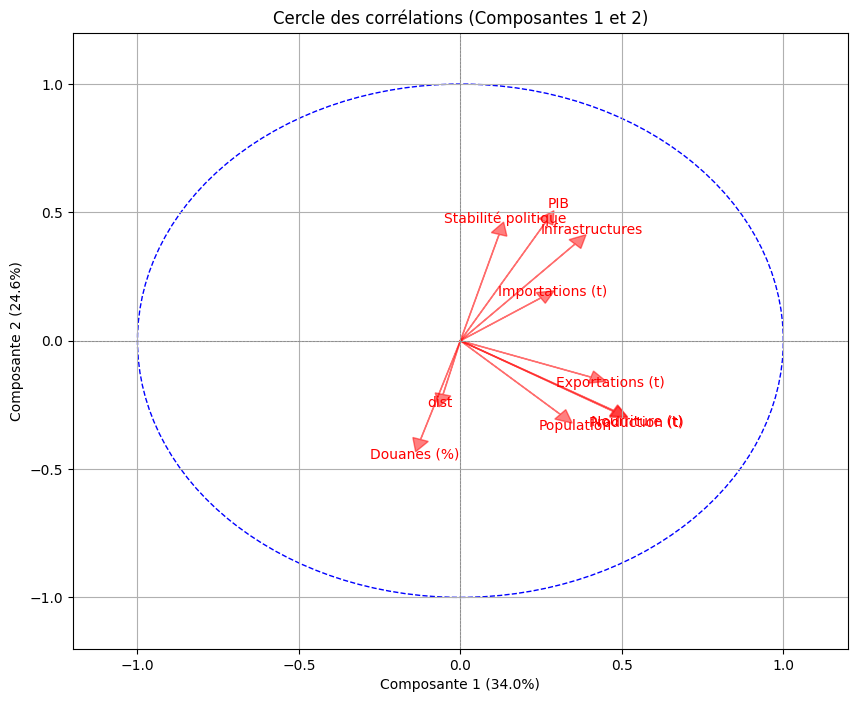

In [12]:
plot_correlation_circle(correlations, 0, 1, explained_variance)




<b><u>Analyse </u></b>
<div>
<b>Composante 1 (34%), Levier de "l'Ouverture et du Volume Commercial" :</b></div>
<ul>Positif : 
<li>Production, exportation, nourriture et population. Cela représente la masse critique d'un pays : plus un pays est grand et produit, plus il exporte. </li>
</ul><ul>Négatif :
<li>Douanes et distance représente les freins au commerce</li></ul>
<div>Levier 1 : puissance de flux - On distingue les économies intégrées et productives (à droite) des économies pénalisées par l'éloignement ou des taxes douanières élevées (à gauche).</div>
<br>

<b>Composante 2 (24.6%), Levier du développement et de la stabilité :</b></div>
<ul>Positif : 
<li>PIB, Stabilité politique et infrastructures. Définissent la maturité d'un économie. </li>
</ul><ul>Négatif :
<li>Population, production et nourriture. </li></ul>
<div>Levier 2 : Qualité du développement - Il oppose les pays riches, stables et bien équipés (en haut) aux pays dont l'économie est davantage tirée par la démographie et l'agriculture/production de base (en bas).</div>
<br>

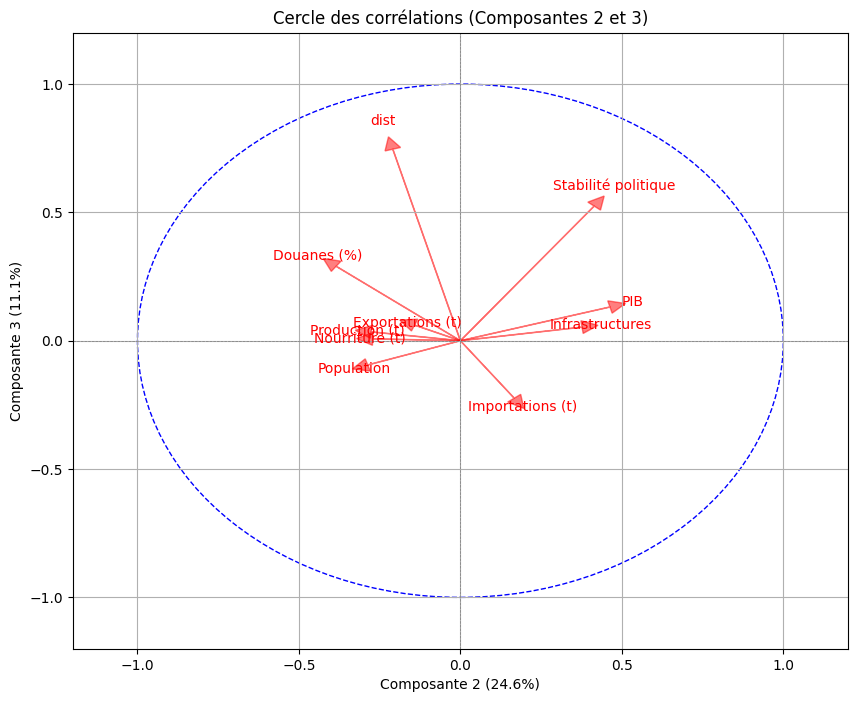

In [13]:
plot_correlation_circle(correlations, 1, 2, explained_variance)


<b><u>Analyse </u></b>
<div>
<b>Composante 2 (24.6%), Levier du développement et de la stabilité :</b></div>
<ul>Positif : 
<li>PIB, Stabilité politique et infrastructures. Définissent la maturité d'un économie. </li>
</ul><ul>Négatif :
<li>Population, production et nourriture. </li></ul>
<div>Levier 2 : Qualité du développement - Il oppose les pays riches, stables et bien équipés (en haut) aux pays dont l'économie est davantage tirée par la démographie et l'agriculture/production de base (en bas).</div>
<b>Composante 3 (11%), Levier de "l'Isolement Géographique" :</b></div>
<ul>Positif (vers le haut) : 
<li>C'est le pôle de l'Éloignement. On y trouve la distance physique (dist) et, de manière intéressante, la Stabilité politique et les Douanes (%). Cela suggère que certains pays stables ou protégés par des taxes sont aussi les plus éloignés géographiquement. </li>
</ul><ul>Négatif :
<li>C'est le pôle des Flux de Dépendance. On y trouve principalement les Importations (t). Plus un pays est bas sur cet axe, plus il importe massivement en volume.</li></ul>
<br>

Résumé des 3 composantes :
<ul><li>PC1 - 34% - Puissance de masse - Volume de production, exportations et population</li>
<li>PC2 24.6% - Qualité structurelle - Niveau de richesse (PIB), infrastructures et barrières</li>
<li> PC3 - 11.1% - Contraintes Logistiques - Opposition entre éloignement (distance et la capacité d'importation.)</li>
</ul>


Variance expliquée par chaque composante : [0.34017029 0.24583521 0.11119346]


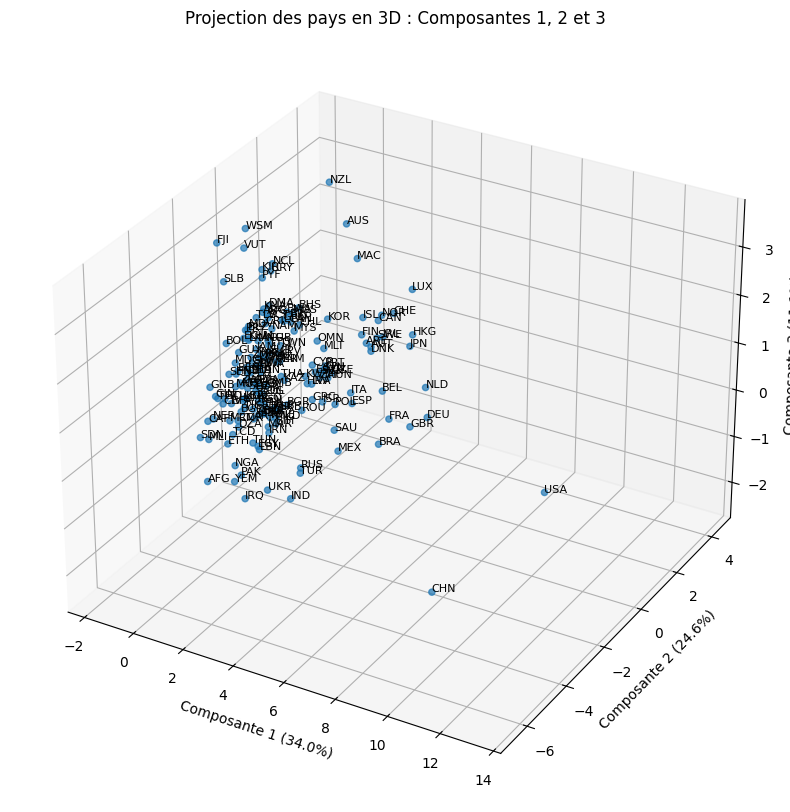

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Appliquer l'ACP avec 3 composantes et obtenir les coordonnées
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_standardise)  # X_pca contient les coordonnées des pays

# Afficher la variance expliquée
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)

# Créer la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Projeter les données sur les 3 premières composantes
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7)

# Ajouter les noms des pays 
for i in range(len(df_donnees)):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], df_donnees['Country Code'][i], fontsize=8)

# Ajouter les labels
ax.set_xlabel(f'Composante 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'Composante 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'Composante 3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title('Projection des pays en 3D : Composantes 1, 2 et 3')

# Afficher le graphique
plt.show()



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Clustering des pays</h3>

<b><u>Classification Ascendante Hiérarchique (CAH)</u></b>

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculer la matrice de distance
Z = linkage(X_pca, method='ward', metric='euclidean')


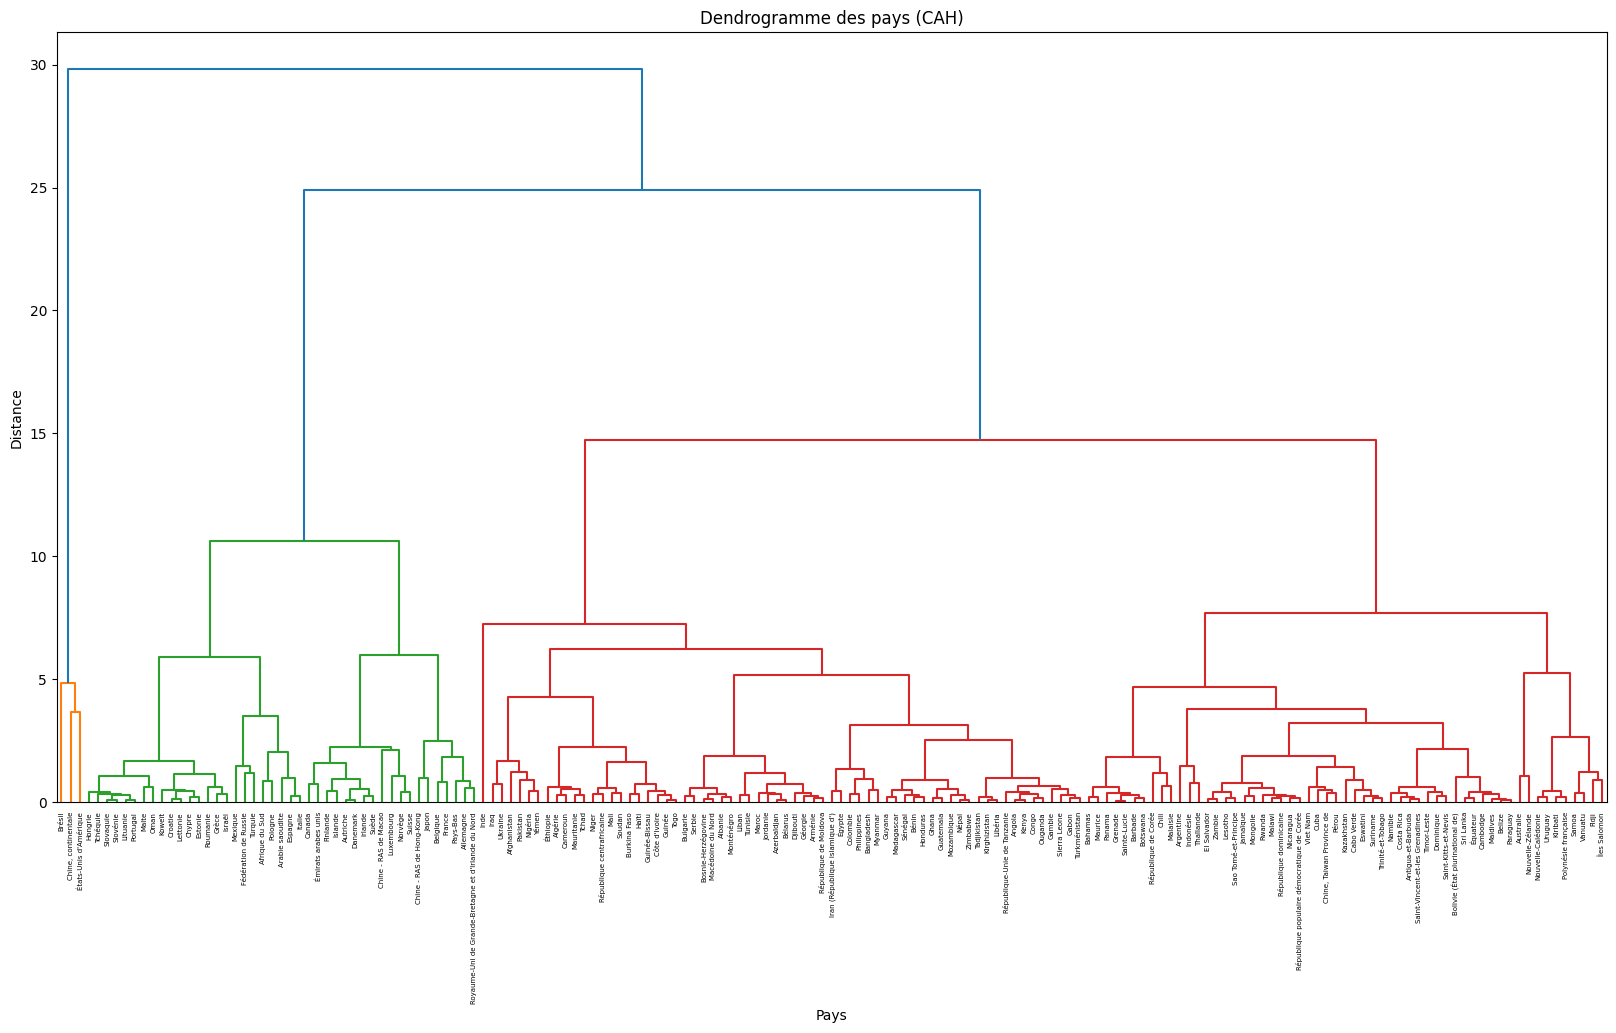

In [16]:
plt.figure(figsize=(20, 10))
dendrogram(Z, labels=df_donnees['Zone'].values, orientation='top', leaf_rotation=90)
plt.title("Dendrogramme des pays (CAH)")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">K-means</h3>

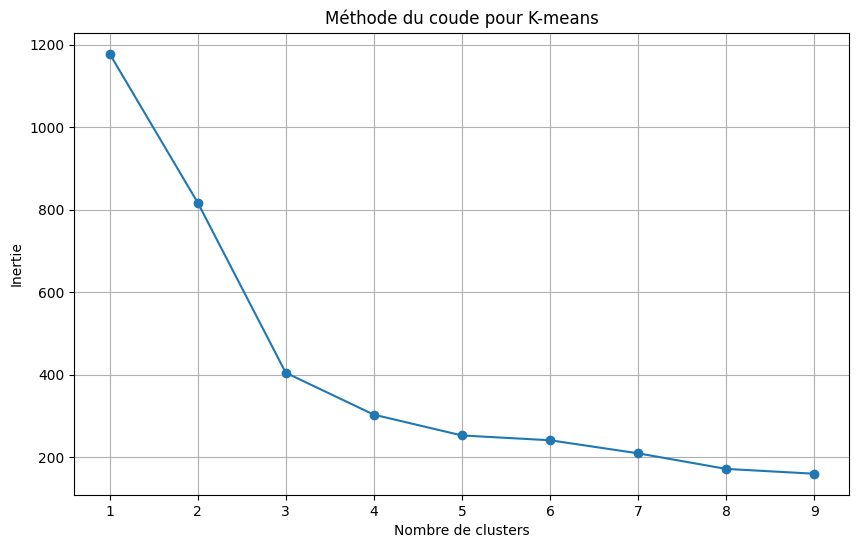

In [17]:
from sklearn.cluster import KMeans

# Calculer l'inertie 
inerties = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inerties.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inerties, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour K-means")
plt.grid()
plt.show()


Le "coude" est particulièrement marqué à $k=3$ : C'est le point de rupture le plus net. Passer de 2 à 3 clusters réduit drastiquement l'inertie (de ~800 à ~400), tandis que la pente s'adoucit considérablement après 3. Le choix de 3 cluster est cohérant avec l'ACP ou l'on distingue parfaitement les 3 couleurs du dendrogramme. Cela permettra de classer les pays selon leur dominance sur l'un des trois leviers : Masse, Développement ou Enclavement.

<ul>Les 3 clusters : 
<li>Les géant producteurs </li>
<li>Les économies matures </li>
<li>Les marchés en Transitions/isolés </li>

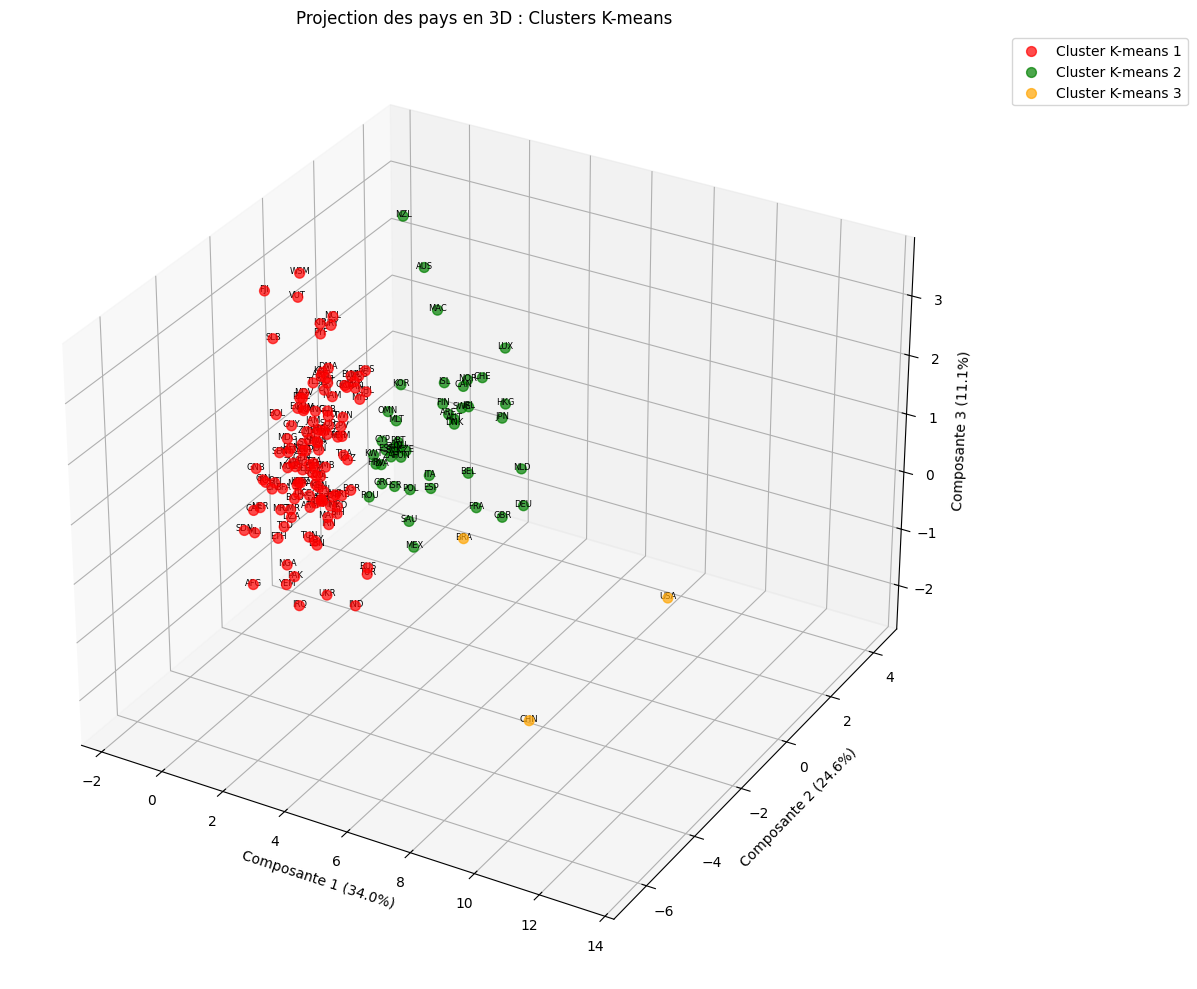

In [18]:
from sklearn.cluster import KMeans

# Appliquer K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

# Ajouter les clusters au DataFrame
df_donnees['Cluster_Kmeans'] = clusters_kmeans

# Définir les couleurs pour les clusters K-means
cluster_colors_kmeans = {0: 'red', 1: 'green', 2: 'orange'}

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Créer la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Projeter les données et colorer par cluster K-means
for cluster in [0, 1, 2]:
    mask = df_donnees['Cluster_Kmeans'] == cluster
    ax.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        X_pca[mask, 2],
        color=cluster_colors_kmeans[cluster],
        label=f'Cluster K-means {cluster + 1}',
        alpha=0.7,
        s=50
    )

# Ajouter les noms des pays (optionnel)
for i in range(len(df_donnees)):
    ax.text(
        X_pca[i, 0],
        X_pca[i, 1],
        X_pca[i, 2],
        df_donnees['Country Code'][i],
        fontsize=6,
        ha='center'
    )

# Ajouter les labels et la légende
ax.set_xlabel(f'Composante 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'Composante 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'Composante 3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title('Projection des pays en 3D : Clusters K-means')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Activer la rotation interactive
plt.tight_layout()
plt.show(block=False)  # Permet de faire tourner le graphique avec la souris


In [19]:
from scipy.cluster.hierarchy import fcluster

clusters_cah = fcluster(Z, t=14, criterion='distance')
df_donnees['Cluster_CAH'] = clusters_cah

df_donnees

,Zone,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB,Infrastructures,Douanes (%),dist,Cluster_Kmeans,Cluster_CAH
0,Afghanistan,36296113.0,2000.0,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771,1.835473,NaN,5590.3810,0,3
1,Afrique du Sud,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083,3.776261,6.67,9353.5520,1,2
2,Albanie,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969,1.980952,1.22,1603.5340,0,3
3,Algérie,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540,2.577318,12.32,1340.3900,0,3
4,Allemagne,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958,4.439356,2.48,439.8984,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716,4.069324,4.56,5249.5350,1,2
165,Équateur,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448,2.469210,9.42,9367.0980,0,4
166,États-Unis d'Amérique,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073,4.152011,3.36,5838.1570,2,1
167,Éthiopie,106399924.0,1000.0,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434,2.117674,NaN,5582.5020,0,3


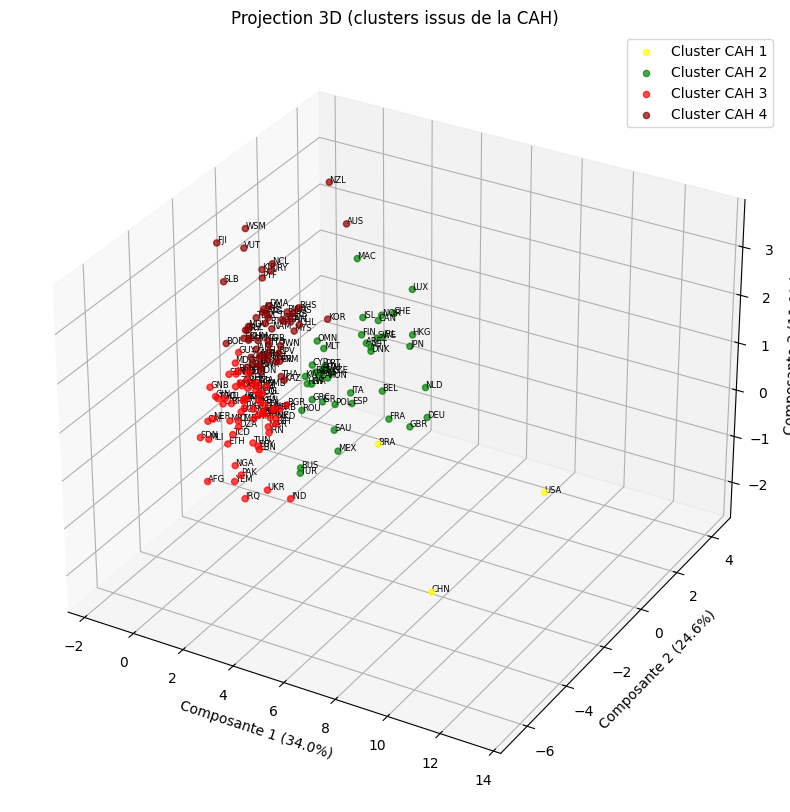

In [20]:
# Définir les couleurs pour les clusters de la CAH
cluster_colors = {1: 'yellow', 2: 'green', 3: 'red', 4:'darkred'}

# Créer la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Projeter les données et colorer par cluster CAH
for cluster in [1, 2, 3, 4]:
    mask = df_donnees['Cluster_CAH'] == cluster
    ax.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        X_pca[mask, 2],
        color=cluster_colors[cluster],
        label=f'Cluster CAH {cluster}',
        alpha=0.7
    )

# Ajouter les noms des pays (optionnel)
for i in range(len(df_donnees)):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], df_donnees['Country Code'][i], fontsize=6)

ax.set_xlabel(f'Composante 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'Composante 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'Composante 3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title('Projection 3D (clusters issus de la CAH)')
ax.legend()
plt.show()


In [21]:
# Cluster CAH 1 (jaune)
print("Cluster CAH 1 (jaune) :")
cluster_1 = df_donnees[df_donnees['Cluster_CAH'] == 1][['Zone', 'Country Code']]
print(cluster_1.to_string(index=False))

# Cluster CAH 2 (vert)
print("\nCluster CAH 2 (vert) :")
cluster_2 = df_donnees[df_donnees['Cluster_CAH'] == 2][['Zone', 'Country Code']]
print(cluster_2.to_string(index=False))

# Cluster CAH 3 (rouge)
print("\nCluster CAH 3 (rouge) :")
cluster_3 = df_donnees[df_donnees['Cluster_CAH'] == 3][['Zone', 'Country Code']]
print(cluster_3.to_string(index=False))

# Cluster CAH 4 (rouge foncé)
print("\nCluster CAH 4 (rouge foncé) :")
cluster_4 = df_donnees[df_donnees['Cluster_CAH'] == 4][['Zone', 'Country Code']]
print(cluster_4.to_string(index=False))


Cluster CAH 1 (jaune) :
                 Zone Country Code
               Brésil          BRA
  Chine, continentale          CHN
États-Unis d'Amérique          USA

Cluster CAH 2 (vert) :
                                               Zone Country Code
                                     Afrique du Sud          ZAF
                                          Allemagne          DEU
                                    Arabie saoudite          SAU
                                           Autriche          AUT
                                           Belgique          BEL
                                             Canada          CAN
                           Chine - RAS de Hong-Kong          HKG
                               Chine - RAS de Macao          MAC
                                             Chypre          CYP
                                            Croatie          HRV
                                           Danemark          DNK
                                

In [26]:
import plotly.express as px

# Créer la carte pour le Cluster 1
fig = px.choropleth(
    cluster_1,
    locations="Country Code",
    color_discrete_sequence=['orange'],  # Tous les pays en orange
    hover_name="Zone",
    title="Carte des pays du Cluster 1 (méthode CAH) - en orange"
)

# Mettre à jour la mise en page pour supprimer la légende
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    showlegend=False,
    title_text="Cluster 1 - Géants mondiaux"
)

# Afficher la carte
fig.show()


In [27]:
# Créer la carte pour le Cluster 2
fig = px.choropleth(
    cluster_2,
    locations="Country Code",
    color_discrete_sequence=['green'],  # Tous les pays en vert
    hover_name="Zone",
    title="Carte des pays du Cluster 2 (méthode CAH) - en vert"
)

# Mettre à jour la mise en page pour supprimer la légende
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    showlegend=False,
    title_text="Cluster 1 - Economies développées et matures"
)

# Afficher la carte
fig.show()

In [28]:
# Créer la carte pour le Cluster 3
fig = px.choropleth(
    cluster_3,
    locations="Country Code",
    color_discrete_sequence=['red'],  # Tous les pays en rouge
    hover_name="Zone",
    title="Carte des pays du Cluster 3 (méthode CAH)"
)

# Mettre à jour la mise en page pour supprimer la légende
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    showlegend=False,
    title_text="Cluster 3 - Economies en développement ou isolées"
)

# Afficher la carte
fig.show()

In [29]:
# Filtrer les données pour les Clusters 3 et 4
df_cluster_3_4 = df_donnees[df_donnees['Cluster_CAH'].isin([3, 4])]

# Créer la carte pour le Cluster 3/4
fig = px.choropleth(
    df_cluster_3_4,
    locations="Country Code",
    color_discrete_sequence=['red'],  # Tous les pays en rouge
    hover_name="Zone",
    title="Carte des pays du Cluster 3 (méthode CAH)"
)

# Mettre à jour la mise en page pour supprimer la légende
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    showlegend=False,
    title_text="Cluster 3 - Economies en développement ou isolées"
)

# Afficher la carte
fig.show()

In [25]:
import plotly.graph_objects as go

# Créer le diagramme en coordonnées parallèles
fig = go.Figure(
    go.Parcoords(
        line=dict(
            color=df_donnees['Cluster_CAH'],
            colorscale=[[0, 'orange'], [0.33, 'orange'], [0.33, 'green'], [0.66, 'green'], [0.66, 'red'], [0.83, 'red'], [0.83, 'darkred'], [1, 'darkred']],
            showscale=True,
            cmin=1,
            cmax=4
        ),
        dimensions=[dict(label=col, values=df_donnees[col]) for col in colonnes_numeriques]
    )
)

# Mettre à jour la mise en page
fig.update_layout(title="Diagramme en coordonnées parallèles des clusters (méthode CAH)")

# Afficher le diagramme
fig.show()





In [30]:
# Calculer la moyenne des colonnes numériques pour chaque cluster
df_agg = df_donnees.groupby('Cluster_CAH')[colonnes_numeriques].mean().reset_index()


In [44]:
# Créer le diagramme en coordonnées parallèles
fig = go.Figure(
    go.Parcoords(
        line=dict(
            color=df_agg['Cluster_CAH'],
            colorscale=[[0, 'orange'], [0.25, 'orange'], [0.25, 'green'], [0.5, 'green'], [0.5, 'red'], [0.75, 'red'], [0.75, 'darkred'], [1, 'darkred']],
            showscale=True,
            cmin=1,
            cmax=4
        ),
        dimensions=[dict(label=col, values=df_agg[col]) for col in colonnes_numeriques]
    )
)

# Mettre à jour la mise en page
fig.update_layout(
    title="Diagramme en coordonnées parallèles des clusters agrégés (méthode CAH)",
    width=1000,
    height=500
)

# Afficher le diagramme
fig.show()